<a href="https://colab.research.google.com/github/Han-Archives/Colab/blob/main/%EC%A7%91%EA%B0%92_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.데이터 로드하기

In [1]:
!pip install gdrive_dataset

In [2]:
from gdrivedataset import loader

file_id = "1korokEjnq76DP_igBYoukf86tpE5RIui"
loader.load_from_google_drive(file_id)

========== files ============

data/train.csv
data/sample_submission.csv
data/test.csv



In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data 디렉토리 정의
DATA_DIR = 'data/'

In [4]:
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))
submission = pd.read_csv(os.path.join(DATA_DIR, 'sample_submission.csv'))

In [5]:
train

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,6,1756,Gd,2,422,TA,872,888,Ex,2,1996,1997,1996,204000
1346,1347,9,2748,Gd,3,850,Ex,1850,1850,Ex,2,2006,2006,2006,390000
1347,1348,5,1214,TA,1,318,TA,1214,1214,TA,2,1967,1967,1967,143000
1348,1349,5,894,TA,2,440,TA,864,894,Gd,1,1974,1974,1974,131000


In [6]:
test

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,1,9,1800,Gd,2,702,Ex,1800,1800,Ex,2,2007,2007,2007
1,2,6,1082,TA,1,240,TA,1082,1082,TA,1,1948,1950,1948
2,3,6,1573,Gd,2,440,Gd,756,769,Gd,2,2000,2000,2000
3,4,6,2443,Gd,3,744,Gd,1158,1158,Gd,2,2004,2004,2004
4,5,5,1040,TA,2,686,TA,1040,1040,TA,1,1968,1968,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1346,8,1932,Ex,3,774,Ex,1932,1932,Ex,2,2008,2008,2008
1346,1347,5,912,TA,1,288,TA,912,912,TA,1,1964,1964,1964
1347,1348,4,861,TA,2,288,TA,861,861,Fa,1,1920,1950,1920
1348,1349,5,1430,TA,2,624,Gd,1430,1430,Ex,2,2004,2005,2004


In [7]:
all_data = pd.concat([train, test], ignore_index=True)

all_data

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250.0
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000.0
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000.0
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000.0
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2695,1346,8,1932,Ex,3,774,Ex,1932,1932,Ex,2,2008,2008,2008,NaN
2696,1347,5,912,TA,1,288,TA,912,912,TA,1,1964,1964,1964,NaN
2697,1348,4,861,TA,2,288,TA,861,861,Fa,1,1920,1950,1920,NaN
2698,1349,5,1430,TA,2,624,Gd,1430,1430,Ex,2,2004,2005,2004,NaN


### - NA 확인하기

In [8]:
count_na = all_data.isna().sum()

count_na # test의 target 제외 NA 없음

id                   0
Overall Qual         0
Gr Liv Area          0
Exter Qual           0
Garage Cars          0
Garage Area          0
Kitchen Qual         0
Total Bsmt SF        0
1st Flr SF           0
Bsmt Qual            0
Full Bath            0
Year Built           0
Year Remod/Add       0
Garage Yr Blt        0
target            1350
dtype: int64

## 2. EDA

### - target 변수 확인하기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


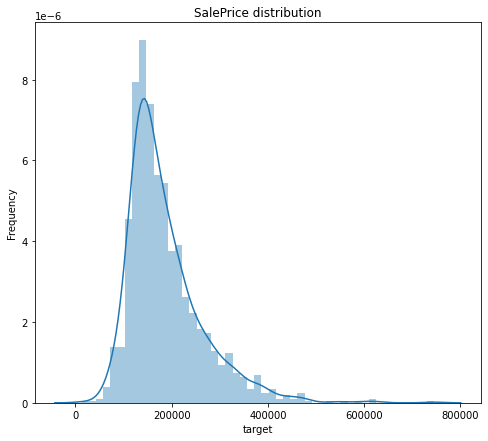

In [9]:
# 변수 전처리하기 전에 target의 분포를 먼저 파악하자
f, ax = plt.subplots(figsize = (8, 7))
sns.distplot(train['target']);
ax.set(ylabel = "Frequency")
ax.set(title = "SalePrice distribution")
plt.show()

In [10]:
stats.skew(train['target'])

1.7156766516750925

target의 분포를 확인해보면 이상치의 영향으로 왜도 값이 1.71로 기울어져 있는 것 같다. np.log 변환을 하기 전에 변환 과정으로 정규화 되는 지 먼저 확인해보자.

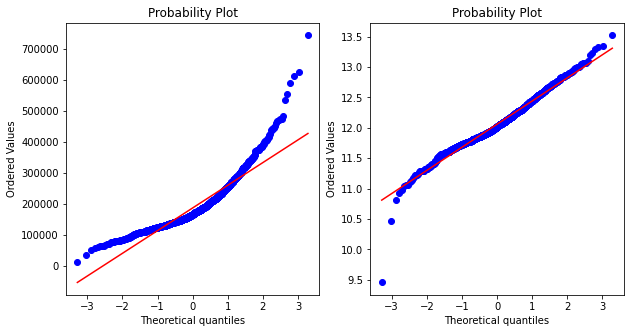

In [11]:
fig = plt.figure(figsize = (10,5))
fig.add_subplot(1,2,1)
res = stats.probplot(train['target'], plot=plt)
fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(train['target']), plot=plt)

np.log를 한 결과 대부분의 값들이 정규화된 것을 확인

In [12]:
train['target'] = np.log1p(train['target'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


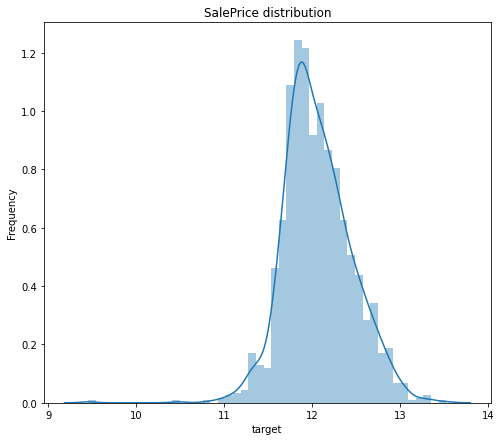

In [13]:
f, ax = plt.subplots(figsize = (8, 7))
sns.distplot(train['target']);
ax.set(ylabel = "Frequency")
ax.set(title = "SalePrice distribution")
plt.show()

In [14]:
stats.skew(train['target'])

0.0806348447630469

### - 숫자형 변수 확인하기

In [15]:
numeric_cols = []
numeric_dtype = ['int32', 'int64']

# 숫자형 설명 변수 집합
for i in train.columns:
    if train[i].dtype in numeric_dtype:
        numeric_cols.append(i)
print('numeric variables', numeric_cols)

numeric variables ['id', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt']


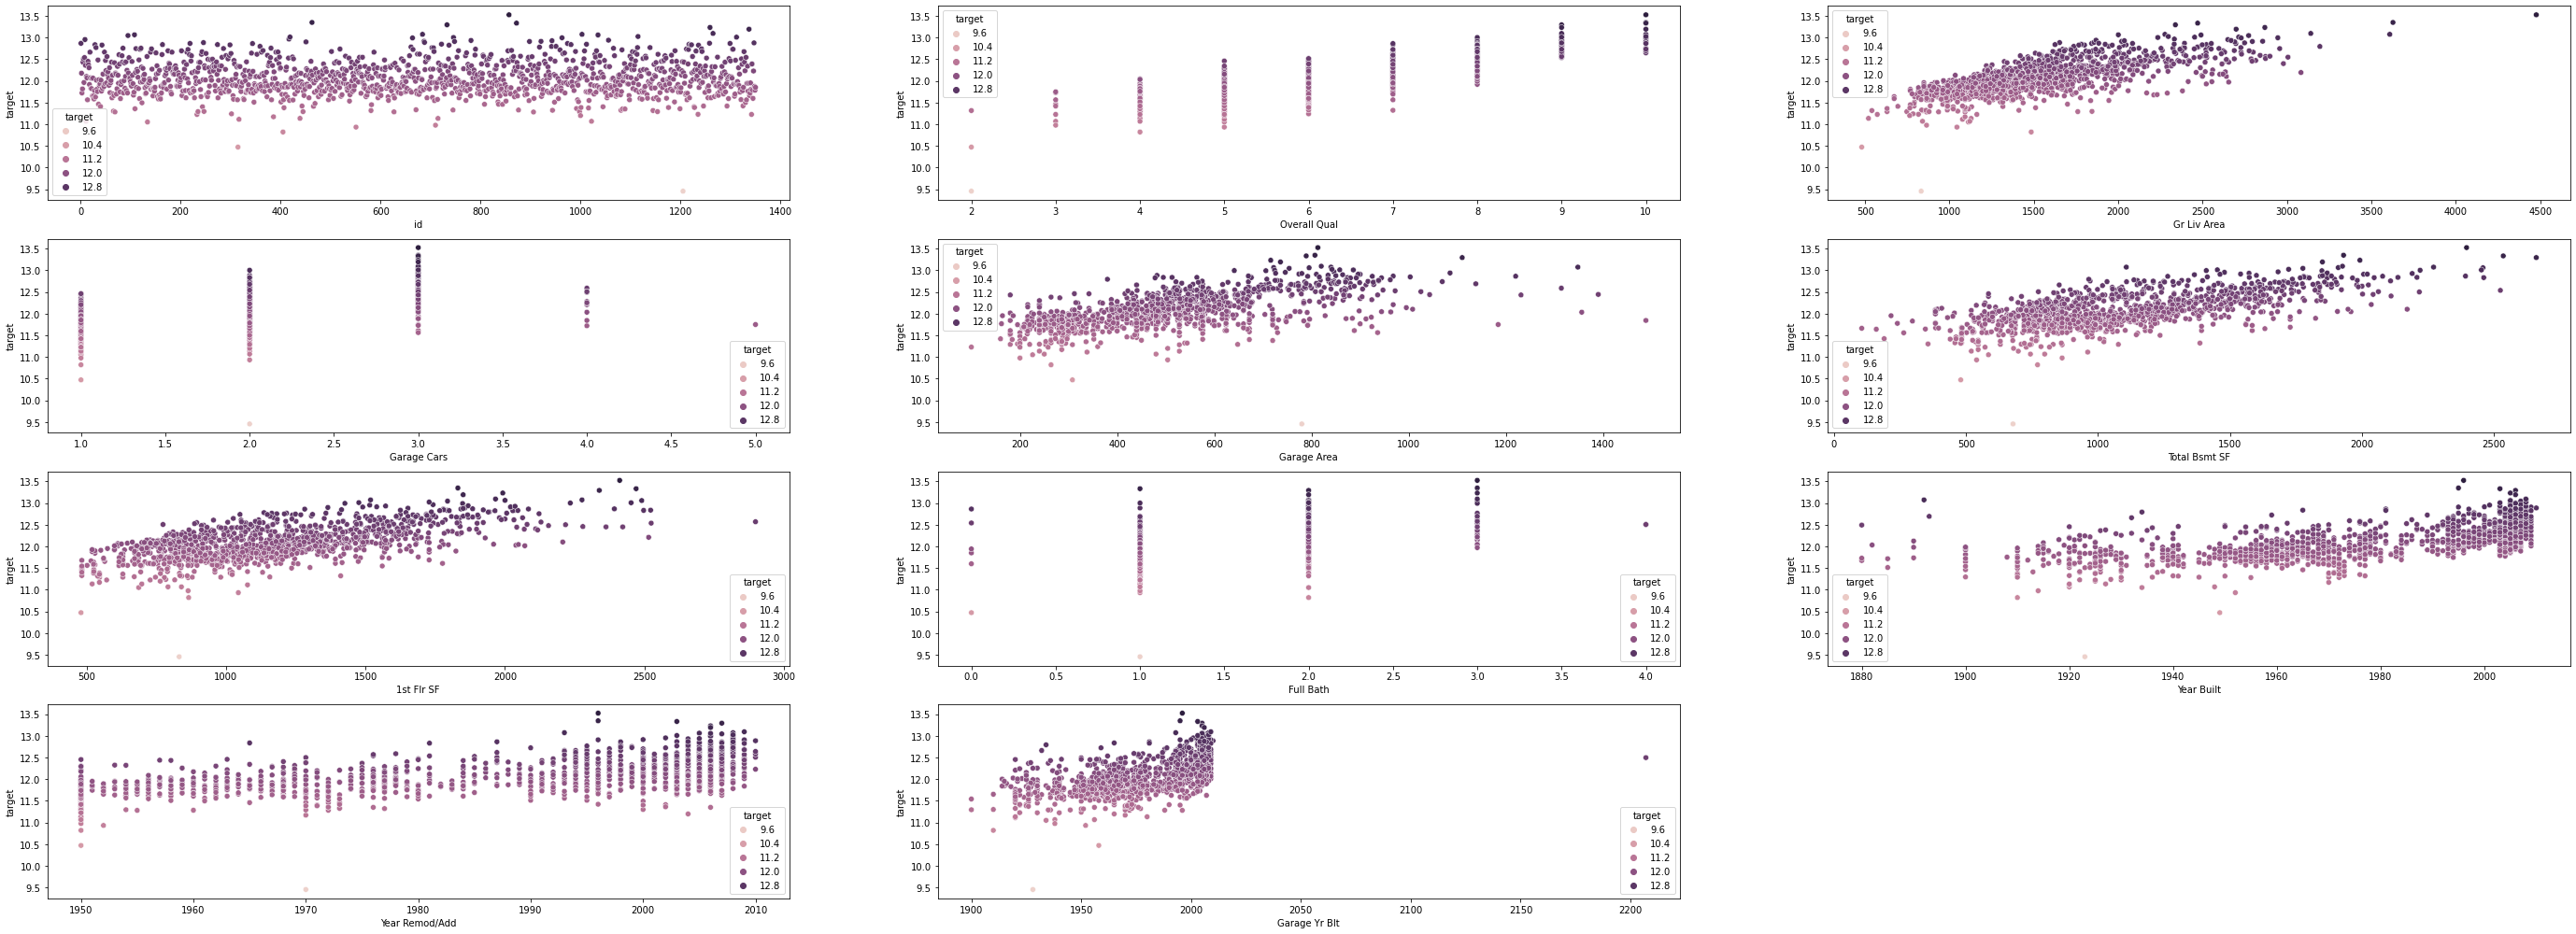

In [16]:
# plot 그리기
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (20, 20))
plt.subplots_adjust(right = 2)
plt.subplots_adjust(top = 2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(train[numeric_cols]), 1):
        
    plt.subplot(len(list(numeric_cols)), 3, i)
    sns.scatterplot(x = feature, y = 'target', hue = 'target', data = train)
    
plt.show()

### - 범주형 자료 확인하기

In [17]:
## 범주형 독립 변수에 대한 분포 확인하기
category_cols = []

# 범주형 변수 집합들
for i in train.columns:
    if train[i].dtype == 'object':
        category_cols.append(i)
print('category variables', category_cols)

category variables ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


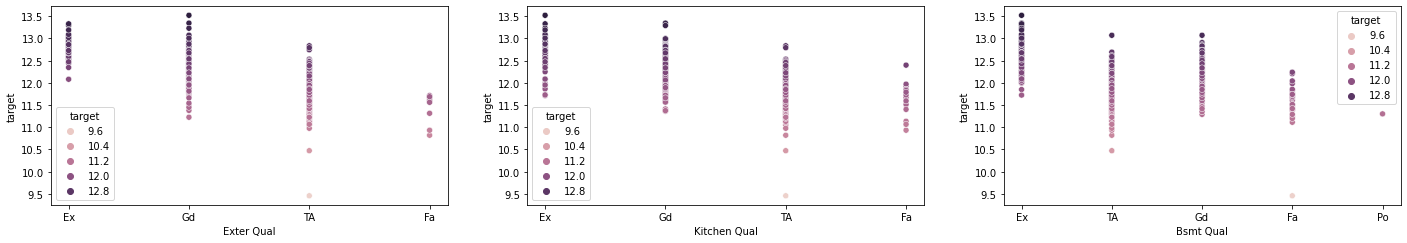

In [18]:
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize = (10, 5))
plt.subplots_adjust(right = 2)
plt.subplots_adjust(top = 2)
sns.color_palette("husl", 8)
for i, feature in enumerate(list(train[category_cols]), 1):
        
    plt.subplot(len(list(category_cols)), 3, i)
    sns.scatterplot(x = feature, y = 'target', hue = 'target', data = train)
    
plt.show()

### - 변수 간의 상관관계를 파악하자

상관관계가 0.4 이상인 상관관계만 확인해보자.

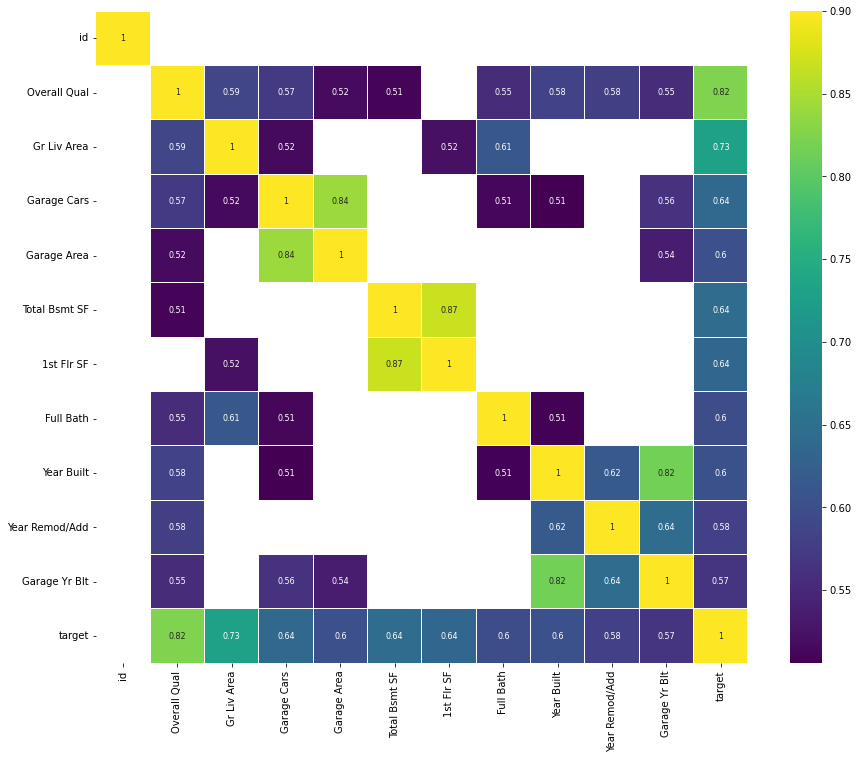

In [19]:
corr = train.corr()
plt.subplots(figsize = (15, 12))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], cmap = 'viridis', vmax = 0.9, linewidth = 0.1, annot = True, annot_kws = {'size': 8}, square = True)

## 3. 변수 선택

모든 설명 변수가 target과 상관관계가 0.5 이상이지만 설명 변수간의 상관관계 (다중 공선성)이 보이는 변수도 확인이 된다.

제외할 변수는 아래와 같다.
- id
- Garage Cars : Garage Area와 의미상으로도 비슷함
- Total Bsmt SF : 1층 면적(1st Fir SF)와 큰 상관관계가 있음

In [20]:
# train 변수 선택
train = train.drop(['id','Garage Cars','Total Bsmt SF'],axis=1)

In [21]:
# test 변수 선택
test = test.drop(['id','Garage Cars','Total Bsmt SF'],axis=1)

## 4. 데이터 전처리

### - 이상치 제거

위 plot에서 확인할 수 있었던 변수 안의 이상치를 제거하자.

In [22]:
from sklearn import preprocessing

# train
minmax_scaler = preprocessing.MinMaxScaler().fit(train[['Gr Liv Area', 'Garage Area', '1st Flr SF', 'Garage Yr Blt']] )
train[['Gr Liv Area', 'Garage Area', '1st Flr SF', 'Garage Yr Blt']] = minmax_scaler.transform(train[['Gr Liv Area', 'Garage Area', '1st Flr SF', 'Garage Yr Blt']])

In [23]:
# test
minmax_scaler = preprocessing.MinMaxScaler().fit(test[['Gr Liv Area', 'Garage Area', '1st Flr SF', 'Garage Yr Blt']] )
test[['Gr Liv Area', 'Garage Area', '1st Flr SF', 'Garage Yr Blt']] = minmax_scaler.transform(test[['Gr Liv Area', 'Garage Area', '1st Flr SF', 'Garage Yr Blt']])

### - 범주형 변수 변환

In [24]:
for i in category_cols:
    le = preprocessing.LabelEncoder() 
    le.fit(list(train[i].values)) 
    train[i] = le.transform(list(train[i].values))

In [25]:
for i in category_cols:
    le = preprocessing.LabelEncoder() 
    le.fit(list(test[i].values)) 
    test[i] = le.transform(list(test[i].values))

In [26]:
train_cols = train.drop('target', axis=1)

In [27]:
train_cols.shape

(1350, 11)

In [28]:
X_train = train_cols[:train.shape[0]]

X_train

,Overall Qual,Gr Liv Area,Exter Qual,Garage Area,Kitchen Qual,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt
0,10,0.478478,0,0.625360,0,0.790736,0,2,2003,2003,0.335505
1,7,0.218218,2,0.263689,2,0.360629,0,2,2006,2007,0.345277
2,5,0.105105,3,0.135447,3,0.173697,4,1,1967,1967,0.218241
3,5,0.173674,3,0.342939,2,0.082713,4,1,1900,2006,0.325733
4,7,0.369870,2,0.602305,2,0.225806,2,2,2005,2005,0.342020
...,...,...,...,...,...,...,...,...,...,...,...
1345,6,0.319319,2,0.231988,3,0.168734,0,2,1996,1997,0.312704
1346,9,0.567568,2,0.540346,0,0.566584,0,2,2006,2006,0.345277
1347,5,0.183684,3,0.157061,3,0.303557,4,2,1967,1967,0.218241
1348,5,0.103604,3,0.244957,3,0.171216,2,1,1974,1974,0.241042


### 5. 모델링

In [29]:
# X_train, X_test, y_train 설정
X_train = train_cols[:train.shape[0]]
X_test = test[:test.shape[0]]

y_train = train["target"]

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=0))

cv = KFold(n_splits=10, shuffle=False)

In [31]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [32]:
X = train_cols
y = y_train

models = [LinearRegression(), Ridge(), ElasticNet(), RandomForestRegressor(), GradientBoostingRegressor(), Lasso(), LGBMRegressor()]
rmses, maes, r2s = [], [], []
for model in models:
    pipe = make_pipeline(StandardScaler(), model)
    
    y_preds = cross_val_predict(pipe, X, y, cv=cv, n_jobs=-1)
    
    rmse = np.sqrt(mean_squared_error(y_train, y_preds))
    mae = mean_absolute_error(y_train, y_preds)
    r2 = r2_score(y_train, y_preds)
    
    rmses.append(rmse)
    maes.append(mae)
    r2s.append(r2)
    
pd.DataFrame({"RMSE": rmses,"MAE": maes,"R2": r2s}, index=models).sort_values(by="R2", ascending=False)

,RMSE,MAE,R2
GradientBoostingRegressor(),0.141748,0.098478,0.863751
RandomForestRegressor(),0.146662,0.099954,0.854140
LGBMRegressor(),0.147577,0.100610,0.852314
Ridge(),0.148771,0.104374,0.849915
LinearRegression(),0.148775,0.104389,0.849907
ElasticNet(),0.384279,0.299829,-0.001371
Lasso(),0.384279,0.299829,-0.001371


In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

parameters = {
    "gradientboostingregressor__learning_rate": [1, 0.5, 0.25, 0.1, 0.05, 0.01],
    "gradientboostingregressor__n_estimators": [1, 2, 4, 8, 16, 32, 64, 100, 200, 500],
    "gradientboostingregressor__max_depth": np.arange(1, 33),
}

pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor())
rand_grid = RandomizedSearchCV(pipe, parameters, n_iter=100, scoring="r2", n_jobs=-1, cv=3, verbose=1)
rand_grid.fit(X_train, y_train)

print()
print(f"Best parameters: {rand_grid.best_params_}")
print(f"Best parameters: {rand_grid.best_score_:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best parameters: {'gradientboostingregressor__n_estimators': 64, 'gradientboostingregressor__max_depth': 3, 'gradientboostingregressor__learning_rate': 0.1}
Best parameters: 0.8543


In [34]:
parameters = {
    "gradientboostingregressor__learning_rate": [0.03, 0.04, 0.05, 0.06, 0.07],
    "gradientboostingregressor__n_estimators": [180, 190, 200, 210, 220],
    "gradientboostingregressor__max_depth": [1, 2, 3, 4],
}

grid = GridSearchCV(pipe, parameters, scoring="r2", n_jobs=-1, cv=3, verbose=1)
grid.fit(X_train, y_train)

print()
print(f"Best parameters: {grid.best_params_}")
print(f"Best parameters: {grid.best_score_:.4f}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits

Best parameters: {'gradientboostingregressor__learning_rate': 0.06, 'gradientboostingregressor__max_depth': 4, 'gradientboostingregressor__n_estimators': 200}
Best parameters: 0.8557


In [35]:
learning_rate = grid.best_params_['gradientboostingregressor__learning_rate']
max_depth = grid.best_params_['gradientboostingregressor__max_depth']
n_estimators = grid.best_params_['gradientboostingregressor__n_estimators']

pipe = make_pipeline(StandardScaler(), GradientBoostingRegressor(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators))

pipe.fit(X_train, y_train)
y_preds = np.expm1(pipe.predict(X_test))
y_preds

array([289275.735635  , 129505.29650433, 179786.85306209, ...,
        76628.09846107, 165294.11372148, 114249.65818333])

In [36]:
predictions = pd.DataFrame({"id": submission["id"], "target": y_preds})
predictions.head()

,id,target
0,1,289275.735635
1,2,129505.296504
2,3,179786.853062
3,4,223121.097584
4,5,121895.472872


In [37]:
predictions.to_csv("./data/output.csv", index=False)

2번째 제출물 결과

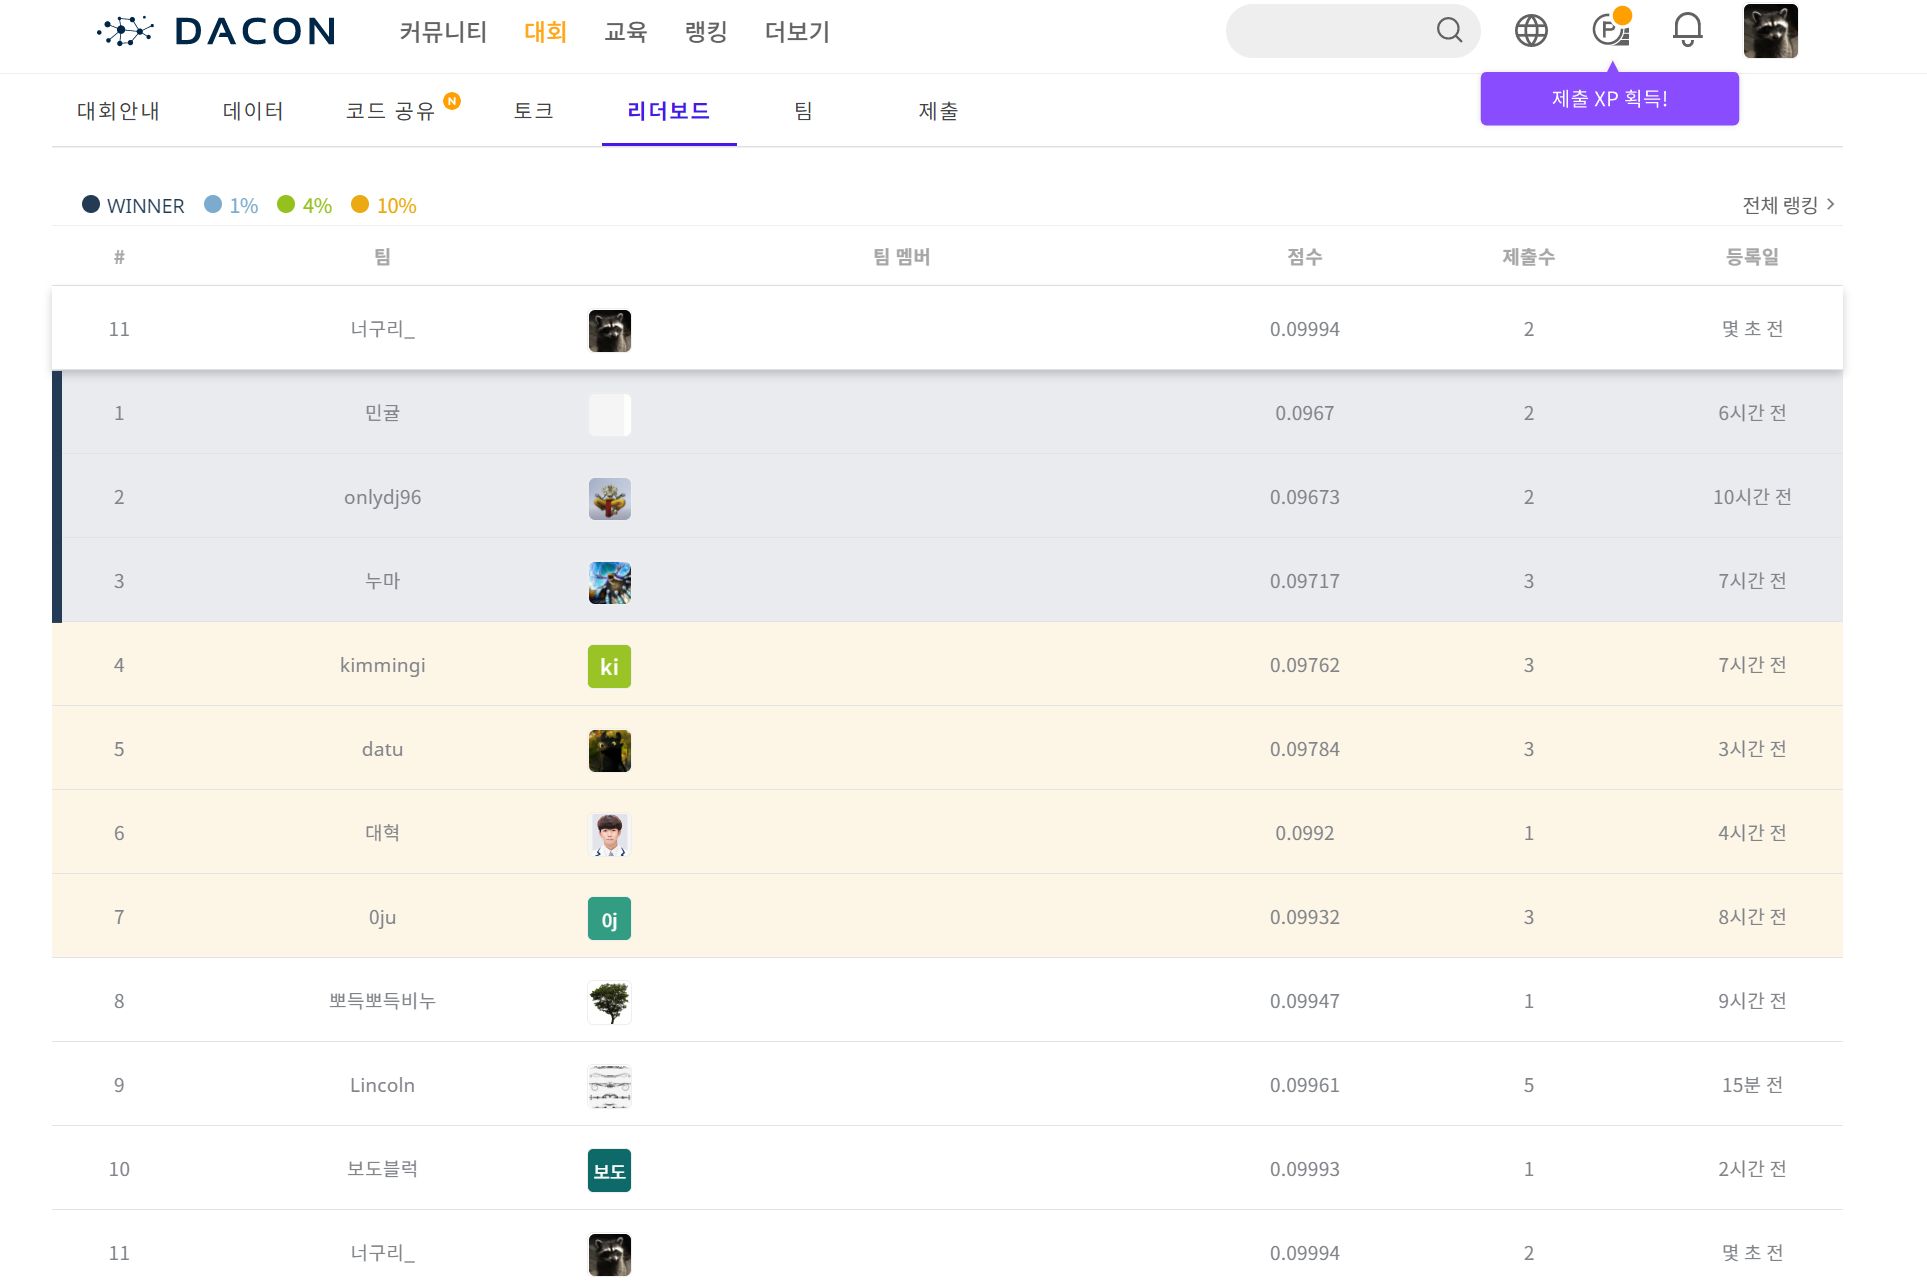